# Problem 08
### In this week's problem We applied `KNN, Logistic Regression, SVM and Naive Bayes` with Grid Search CV.
### After it, we plotted the decision regions after PCA to see the behavior of this algorithm and how its changes affect the result.

### The dataset that we'll use is: [Pima Indians Diabetes Database](https://data.world/data-society/pima-indians-diabetes-database).

# 1 - Imports

`Libraries:`

In [30]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.metrics import f1_score
from sklearn.decomposition import PCA
from mlxtend.plotting import plot_decision_regions

from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression

from sklearn.pipeline import make_pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler, StandardScaler

`Dataset:`

In [4]:
filename = '/home/joaocarvoli/Downloads/pima-indians-diabetes/diabetes.csv'
df = pd.read_csv(filename)

# 2 - Preprocessing

In [5]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


## Spliting X and y from df

In [18]:
X = df.iloc[:,:-1]
y = df.iloc[:,-1]

In [19]:
X

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,6,148,72,35,0,33.6,0.627,50
1,1,85,66,29,0,26.6,0.351,31
2,8,183,64,0,0,23.3,0.672,32
3,1,89,66,23,94,28.1,0.167,21
4,0,137,40,35,168,43.1,2.288,33
...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63
764,2,122,70,27,0,36.8,0.340,27
765,5,121,72,23,112,26.2,0.245,30
766,1,126,60,0,0,30.1,0.349,47


In [20]:
y

0      1
1      0
2      1
3      0
4      1
      ..
763    0
764    0
765    0
766    1
767    0
Name: Outcome, Length: 768, dtype: int64

## Spliting and Stratifying

In [9]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=42, stratify=y)

# 3 - Algorithms

### `KNN`

In [47]:
parameters = {'n_neighbors':[3,5,7,9,11], 'weights':('uniform', 'distance'), 'algorithm':('auto', 'ball_tree', 'kd_tree', 'brute'), 'p':[1,2]}
knn_grid = KNeighborsClassifier()
grid_knn = GridSearchCV(estimator = knn_grid,  param_grid = parameters, scoring = 'f1', cv = 5)
grid_knn.fit(X_train, y_train)

print(f'The best parameters are: {grid_knn.best_params_}')
print(f'The best score is: {grid_knn.best_score_}')

The best parameters are: {'algorithm': 'auto', 'n_neighbors': 11, 'p': 1, 'weights': 'uniform'}
The best score is: 0.6172039047755478


### `Logistic Regression`

In [ ]:
parameters_log = {'penalty':('l1', 'l2', 'elasticnet', 'none'),
                  'C':[1000,500,100,10,1,0.1,0.01,0.001],
                  'solver':('newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga'),
                  'l1_ratio':[1,0.5,0],
                  'max_iter':[300,500,700]}
log_grid = LogisticRegression()
grid_log = GridSearchCV(estimator = log_grid,  param_grid = parameters_log, scoring = 'f1', cv = 5)
grid_log.fit(X_train, y_train)

print(f'The best parameters are: {grid_log.best_params_}')
print(f'The best score is: {grid_log.best_score_}')

In [39]:
print(f'The best parameters are: {grid_log.best_params_}')
print(f'The best score is: {grid_log.best_score_}')

The best parameters are: {'C': 0.1, 'l1_ratio': 1, 'max_iter': 300, 'penalty': 'l2', 'solver': 'newton-cg'}
The best score is: 0.653160895587083


### `SVM`

In [45]:
parameters_svc = {'decision_function_shape':('ovo', 'ovr'),
                  'kernel':['linear']}
svc_grid = SVC()
grid_svc = GridSearchCV(estimator = svc_grid,  param_grid = parameters_svc, scoring = 'f1', cv = 5)
grid_svc.fit(X_train, y_train)

print(f'The best parameters are: {grid_svc.best_params_}')
print(f'The best score is: {grid_svc.best_score_}')

The best parameters are: {'decision_function_shape': 'ovo', 'kernel': 'linear'}
The best score is: 0.6419914622197438


### `Naive Bayes`

In [76]:
parameters_naive = {'var_smoothing':[1e-9]}
naive_grid = GaussianNB()
grid_naive = GridSearchCV(estimator = naive_grid, param_grid = parameters_naive, scoring = 'f1', cv = 5)
grid_naive.fit(X_train, y_train)

print(f'The best parameters are: {grid_naive.best_params_}')
print(f'The best score is: {grid_naive.best_score_}')

The best parameters are: {'var_smoothing': 1e-09}
The best score is: 0.6377791896779239


- ## Aplying the best results of Grids Searches into dataset without cross-validation

In [83]:
model = LogisticRegression(C = 0.1, max_iter = 300, penalty = 'l2', solver = 'newton-cg')
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

print(f'The previous score was {grid_log.best_score_} and now the score is {f1_score(y_test, y_pred)}')

The previous score was 0.653160895587083 and now the score is 0.5544554455445543


#### _We can see that there is a difference, because when we used Logistic Regression the cross-validation has been applied, and now we don't do it._

# 4 - Understanding decision regions:

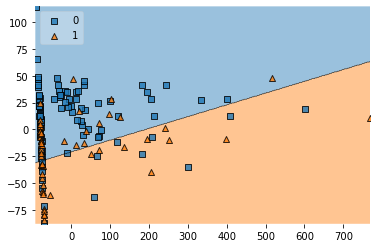

In [26]:
pca = PCA(n_components=2) # PCA(Principal Component Analysis)
X_2D = pca.fit_transform(X_train)
X_2D_test = pca.transform(X_test)

svm = SVC(kernel='linear', random_state=42)
svm.fit(X_2D, y_train)
plot_decision_regions(X_2D_test, np.array(y_test), clf=svm, legend=2)
plt.show()

#### _We can see above that the PCA doesn't give a good reduction of all the features because when we show the decision regions with new data, the test data, there are many points in the wrong place._